In [1]:
import tweepy
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

analyzer = SentimentIntensityAnalyzer()

## Retrieve The Tweets

In [2]:
# Twitter API Keys

consumer_key = "YJ35iwc7l0NHRZi5s2O5KcTKj"
consumer_secret = "LEMyiyMckmyiNNeijwLNKhylxWUaDJKD1sN7V5fGdiNDRguSOr"
access_token = "937015764053254144-6y0sXwkDfa9pCPznit4DPGPMxZlkIRN"
access_token_secret = "dz5WvzO3KSobnicJ9HzBbMhRDOFSCNsPSBssdVKwo44Xc"

# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# User Accounts and corresponding handles

users = ["NY Times", "CBS News", "CNN", "Fox News", "BBC News(World)"]
users_to_handles = {"NY Times": "@nytimes", "CBS News":"@CBSNews", "CNN":"@CNN", "Fox News":"@FoxNews", "BBC News(World)":"@BBCWorld"}

#Contains DF for each user; each DF contains tweets, date of tweets, and sentiment scores

tweets_df_dict = {"NY Times": pd.DataFrame({}),
               "CBS News": pd.DataFrame({}),
               "CNN": pd.DataFrame({}),
               "Fox News": pd.DataFrame({}),
               "BBC News(World)": pd.DataFrame({})   }

for user in users:
    user_tweets = []
    user_dates = []
    for p in range(5):
        public_tweets = api.user_timeline(users_to_handles[user], page=p)
        for tweet in public_tweets:
            user_tweets.append(tweet['text'])
            user_dates.append(tweet['created_at'])
    tweets_df_dict[user]['Text'] = user_tweets 
    tweets_df_dict[user]['Created At'] = user_dates
            
        



## Sentiment Analysis

In [3]:
for user in users:
    tweets_list = tweets_df_dict[user]["Text"]
    positive_scores = [analyzer.polarity_scores(tweets_list[j])["pos"] for j in range(len(tweets_list))  ]
    negative_scores = [analyzer.polarity_scores(tweets_list[j])["neg"] for j in range(len(tweets_list))  ]
    neutral_scores = [analyzer.polarity_scores(tweets_list[j])["neu"] for j in range(len(tweets_list))  ]
    compound_scores = [analyzer.polarity_scores(tweets_list[j])["compound"] for j in range(len(tweets_list))  ]
    tweets_df_dict[user]["Positive Score"] = positive_scores
    tweets_df_dict[user]["Negative Score"] = negative_scores
    tweets_df_dict[user]["Neutral Score"] = neutral_scores
    tweets_df_dict[user]["Compound Score"] = compound_scores
    tweets_df_dict[user]["Account"] = user #Need this when concatenating DFs
    

## Concatenate DataFrames and Export as CSV

In [4]:
frames = [tweets_df_dict[user] for user in users]
data_df = pd.concat(frames)
data_df = data_df.reset_index()
del(data_df['index'])
data_df.to_csv("data.csv")

## Compound Score Scatter Plot For Last 100 Tweets

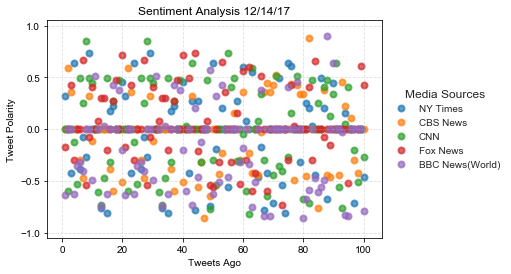

In [5]:
xvals = list(reversed( range(1,101) ))

for user in users:
    plt.scatter(xvals, list(reversed( tweets_df_dict[user]["Compound Score"]  )), alpha = 0.7,linewidth = '2', label = user  )

sns.set(style="darkgrid")    
plt.ylim(-1.05,1.05)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.yticks( [-1,-0.5,0,0.5,1] )
plt.grid(alpha=0.4,linestyle='--')
plt.legend(title = "Media Sources",loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Sentiment Analysis 12/14/17")
plt.savefig("sentiment_scatter.png",bbox_inches='tight')
plt.show()

## Compound Score Bar Plot For Last 100 Tweets

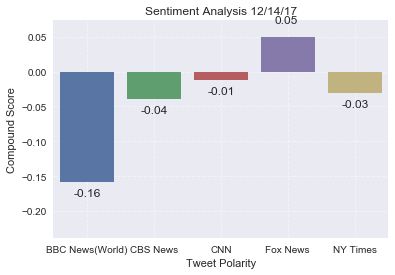

In [8]:
plot_data = data_df.groupby("Account").mean().reset_index()
sns.set(style="darkgrid")
g = sns.barplot(y="Compound Score",x="Account", data = plot_data ,orient='v')
plt.xlabel("Tweet Polarity")
plt.grid(alpha=0.4,linestyle='--')
plt.ylim(1.5*min( plot_data['Compound Score'] ),1.5*max(plot_data['Compound Score']))
plt.title("Sentiment Analysis 12/14/17")

count = -1

for user in users:
    count +=1
    g.text(count-0.2, plot_data["Compound Score"][count] + np.sign(plot_data["Compound Score"][count])*0.02, round(plot_data["Compound Score"][count],2) )


plt.savefig("sentiment_bar.png")
plt.show()


## Trends
#### BBC is the most negative, judging from the bar grap
#### Fox News is the most positive
#### CNN is the most neutral